In [1]:
cd /g/data/jk72/deg581/apom/ana/notebooks

/g/data/jk72/deg581/apom/ana/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import matplotlib.ticker as mticker

## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/122134567.gadi-pbs'

In [3]:


FilePath='/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/' # Truth file settings
prefix='roms_his_'
timeRange = [12, 13]
datelist = np.array(range(timeRange[0],timeRange[1],1))

def add_zeros_to_4(date):
    if date<10:
        to_add = '000'
    elif date>9 & date<100:
        to_add = '00'
    elif date>99 & date < 1000:
        to_add = '0'
    else: 
        to_add = ''
    return to_add

def generateFileList(FilePath,prefix,datelist):
    filelist=[FilePath+prefix+add_zeros_to_4(datelist[0])+str(datelist[0])+'.nc']
    for dates in datelist[1:]:
        filenameToAppend=FilePath+prefix+add_zeros_to_4(dates)+str(dates)+'.nc'
        filelist.append(filenameToAppend)
    return filelist

fl=generateFileList(FilePath,prefix,datelist)
print(fl)

# ds=loadOverlappedNetcdfFileList(filelist=fl,overlapDays=7)

ds = xr.open_mfdataset(fl,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')



['/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0012.nc']
255.264537416 G


In [4]:
grd = xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_v12_grd.nc')

grd['hc']=ds.hc
grd['s_w']=ds.s_w
grd['s_rho']=ds.s_rho
grd['Cs_w']=ds.Cs_w
grd['Cs_r']=ds.Cs_r


In [5]:
# load single ROMS netcdf with xr
# ds = xr.open_dataset('../data/proc/roms_v11_TotOptions_his_0003_5daymn.nc')
ds = xr.open_dataset('../data/proc/roms_v11_ctrl_his_0011-13_5daymn_full.nc')
ds

<xarray.Dataset>
Dimensions:          (ocean_time: 219, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, eta_rho: 750, xi_rho: 900, eta_u: 750,
                      xi_u: 899, eta_v: 749, xi_v: 900, eta_psi: 749,
                      xi_psi: 899)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2017-01-01 ... 2019-12-27
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
Dimensions without coordinates: bnds, tracer, boundary, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/46)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    rho              (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    shflux           (ocean_time, eta_rho, xi_rho) float32 ...
    ssflux           (ocean_time, eta_rho, xi_rho) float32 ...
    sustr            (ocean_time, eta_u, xi_u) float32 ...
    svstr            (ocean_time, eta_v, xi_v) float32 ...
Attributes: (12/34)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0011.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           Wed Apr 10 14:09:20 2024: cdo -v timselmean,5 -cat /g/...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [6]:
# chop in time, selecting a smaller segment
ds = ds.sel(ocean_time=slice('2018-01-01','2020-01-01'))

In [7]:
ds = ds.drop_vars(['Tb','Sb','u_eastward','v_northward','ubar_eastward','vbar_northward','w','shflux','ssflux','sustr','svstr','m','zeta','angle','f'])
print(ds.nbytes/1e9,'G')
ds

61.11430692 G


<xarray.Dataset>
Dimensions:          (ocean_time: 146, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, eta_rho: 750, xi_rho: 900, eta_u: 750,
                      xi_u: 899, eta_v: 749, xi_v: 900, eta_psi: 749,
                      xi_psi: 899)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2018-01-01 ... 2019-12-27
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
Dimensions without coordinates: bnds, tracer, boundary, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/31)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    mask_psi         (eta_psi, xi_psi) float64 ...
    u                (ocean_time, s_rho, eta_u, xi_u) float32 ...
    v                (ocean_time, s_rho, eta_v, xi_v) float32 ...
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    rho              (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
Attributes: (12/34)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0011.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           Wed Apr 10 14:09:20 2024: cdo -v timselmean,5 -cat /g/...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [8]:
ds = ds.assign_coords({"x_rho": grd.x_rho})
ds = ds.assign_coords({"y_rho": grd.y_rho})
ds = ds.assign_coords({"lon_rho": grd.lon_rho})
ds = ds.assign_coords({"lat_rho": grd.lat_rho})

ds['hc'] = grd.hc
ds['s_w']=grd.s_w
ds['s_rho']=grd.s_rho
ds['Cs_w']=grd.Cs_w
ds['Cs_r']=grd.Cs_r


# ds_raw = ds_raw.assign_coords(lon_rho=grd.lon_rho)
# ds_raw = ds_raw.assign_coords(lat_rho=grd.lat_rho)

ds['mask_zice'] = (ds.mask_rho.where(ds.zice<0)==1) # make a logic mask for ice
ds['mask_zice_nan'] = (ds.mask_rho.where(ds.zice<0)==1).where(ds.mask_rho.where(ds.zice<0)==1) # make a mask where non-ice is nan

In [9]:
# make masks

# now make a ROI mask(s)
# plt.figure(figsize=(6,4))
# ds.mask_zice.plot(x='x_rho',y='y_rho')
# plt.grid()
poly_shelf = np.array([
    [1.55e6,600000],
    [2.25e6,600000],
    [2.25e6,800000],
    [2.20e6,830000],
    [1.55e6,890000]])
# plt.plot(poly_shelf[:,0],poly_shelf[:,1])
# plt.show()

def inpolygon(xq, yq, xv, yv):
    from matplotlib import path
    shape = xq.shape
    xq = xq.reshape(-1)
    yq = yq.reshape(-1)
    xv = xv.reshape(-1)
    yv = yv.reshape(-1)
    q = [(xq[i], yq[i]) for i in range(xq.shape[0])]
    p = path.Path([(xv[i], yv[i]) for i in range(xv.shape[0])])
    return p.contains_points(q).reshape(shape)


mask_roi = inpolygon(ds.x_rho.values, ds.y_rho.values,poly_shelf[:,0], poly_shelf[:,1])


ds['mask_zice_roi'] = ds.mask_zice*mask_roi
# ds.mask_zice_roi.plot()
roi_label1 = 'amery'
ds.mask_zice_roi.attrs['long_name']=roi_label1

In [10]:
weights = (1/ds.pm)*(1/ds.pn)
weights.name = "weights"

In [11]:
# ds.load()

In [12]:
# set any grid data here.

weights_area = (1/ds.pm)*(1/ds.pn)
weights_area.name = "weights"

print('making vertical coordinates')
Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = (ds.zice) + ((ds.zice) + ds.h) * Zo_rho
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * ((ds.zice) + ds.h) + (ds.zice)
    
ds.coords['z_w0'] = z_w.where(ds.mask_rho, 0).transpose('s_w', 'eta_rho', 'xi_rho')
ds.coords['z_rho0'] = z_rho.where(ds.mask_rho, 0).transpose('s_rho', 'eta_rho', 'xi_rho')

# ds['dz'] = (('ocean_time','s_rho', 'eta_rho', 'xi_rho'),np.diff(ds.z_w,axis=1))



making vertical coordinates


In [13]:
# map u,v to rho points
def ROMSmetricsAndGrid(ds):
    ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
        'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
        'Z':{'center':'s_rho', 'outer':'s_w'}}

    grid = Grid(ds, coords=coords, periodic=[])

    print('making pm/pn metrics')
    ds['pm_v'] = grid.interp(ds.pm, 'Y')
    ds['pn_u'] = grid.interp(ds.pn, 'X')
    ds['pm_u'] = grid.interp(ds.pm, 'X')
    ds['pn_v'] = grid.interp(ds.pn, 'Y')
    ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
    ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)
    print('making dx/dy')
    ds['dx'] = 1/ds.pm
    ds['dx_u'] = 1/ds.pm_u
    ds['dx_v'] = 1/ds.pm_v
    ds['dx_psi'] = 1/ds.pm_psi

    ds['dy'] = 1/ds.pn
    ds['dy_u'] = 1/ds.pn_u
    ds['dy_v'] = 1/ds.pn_v
    ds['dy_psi'] = 1/ds.pn_psi

#     ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
#     ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
#     ds['dz_u'] = grid.interp(ds.dz, 'X')
#     ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
#     ds['dz_v'] = grid.interp(ds.dz, 'Y')
#     ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

    ds['dA'] = ds.dx * ds.dy

    metrics = {
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        # ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    }
    grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])

    return ds,grid


ds, grid = ROMSmetricsAndGrid(ds)

print('mapping u/v to u/v rho')
ds['u_rho'] = grid.interp(ds.u,'X')
ds['v_rho'] = grid.interp(ds.v,'Y')

making pm/pn metrics
making dx/dy
mapping u/v to u/v rho


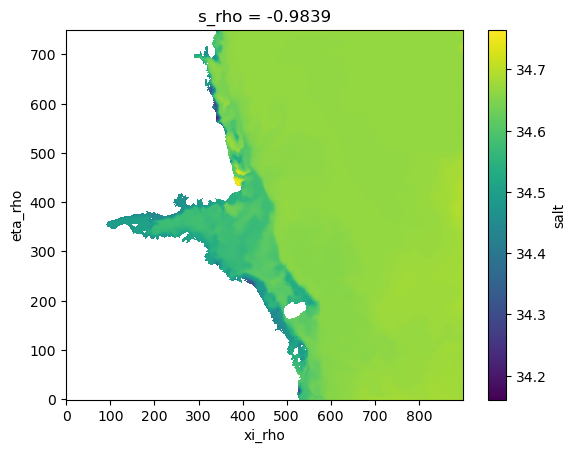

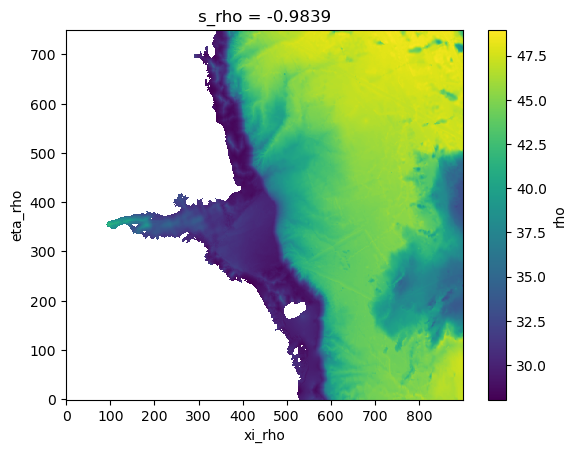

In [14]:
ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot()
plt.show()
ds.rho.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').plot()
# plt.axis((360,380,500,550))

In [15]:
print(ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').isel(xi_rho=390,eta_rho=440).values)

print(ds.temp.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').isel(xi_rho=390,eta_rho=440).values)

print(ds.rho.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').isel(xi_rho=390,eta_rho=440).values)
print(ds.z_rho0.isel(s_rho=0).isel(xi_rho=390,eta_rho=440).values)



print(ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').isel(xi_rho=373,eta_rho=523).values)
print(ds.temp.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').isel(xi_rho=373,eta_rho=523).values)
print(ds.rho.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').isel(xi_rho=373,eta_rho=523).values)
print(ds.z_rho0.isel(s_rho=0).isel(xi_rho=373,eta_rho=523).values)



34.884632
-2.6961663
29.282244
-243.0673248933187
34.662613
-1.4001716
32.55804
-980.7894390319248


In [16]:
import seawater as sw
print(sw.pden(34.877117,sw.temp(34.877117,-2.650027,-243.0673248933187),-243.0673248933187,0))

print(sw.pden(34.658474,sw.temp(34.658474,-1.3651043,-980.7894390319248),-980.7894390319248,0))


1028.1003401389898
1027.890016331943


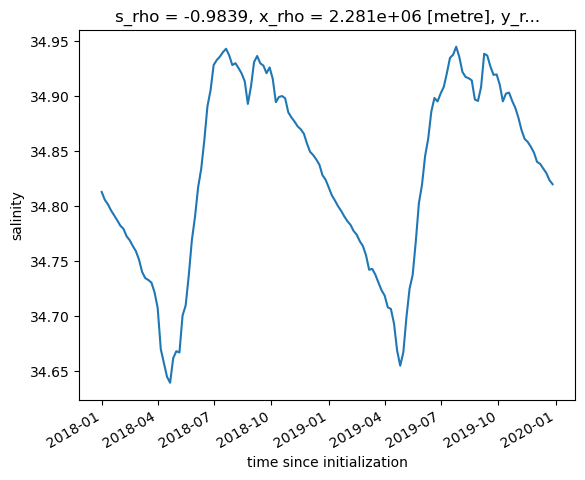

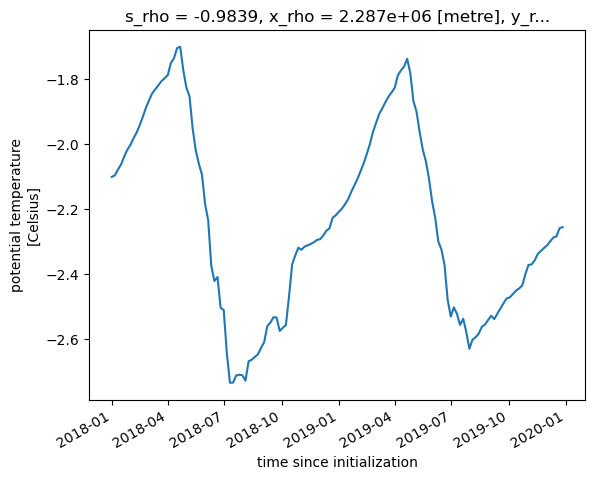

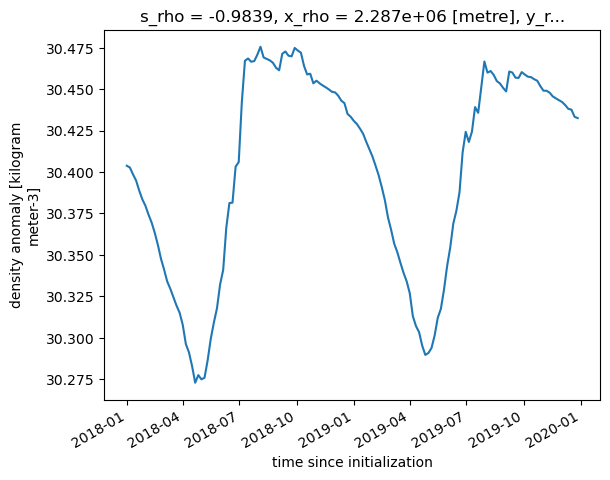

In [17]:
ds.salt.isel(s_rho=0).isel(xi_rho=390,eta_rho=440).plot()
plt.show()
ds.temp.isel(s_rho=0).isel(xi_rho=393,eta_rho=460).plot()
plt.show()
ds.rho.isel(s_rho=0).isel(xi_rho=393,eta_rho=460).plot()


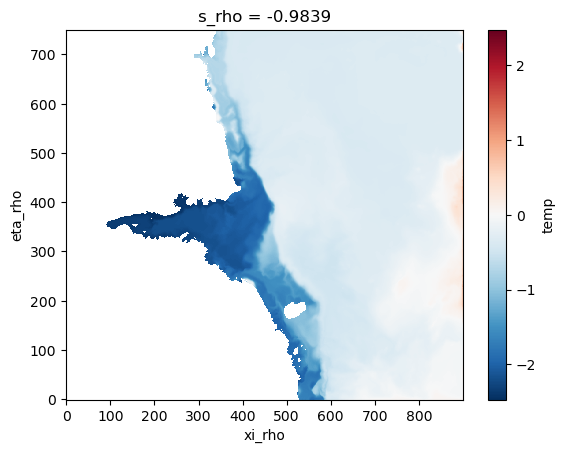

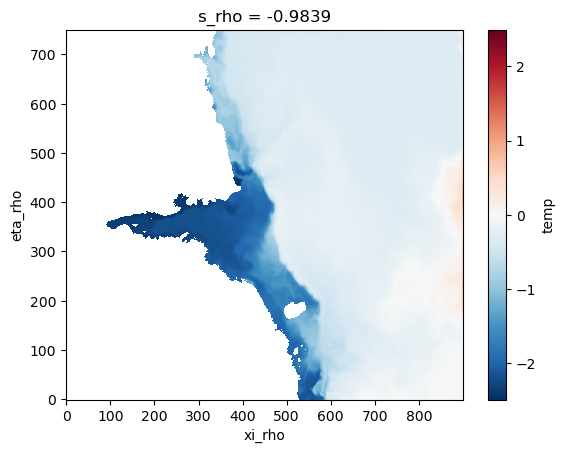

In [18]:
ds.temp.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot()
plt.show()
ds.temp.isel(s_rho=0).isel(ocean_time=slice(55,85)).mean(dim='ocean_time').plot()


Text(0, 0.5, 'salinity')

<Figure size 640x480 with 0 Axes>

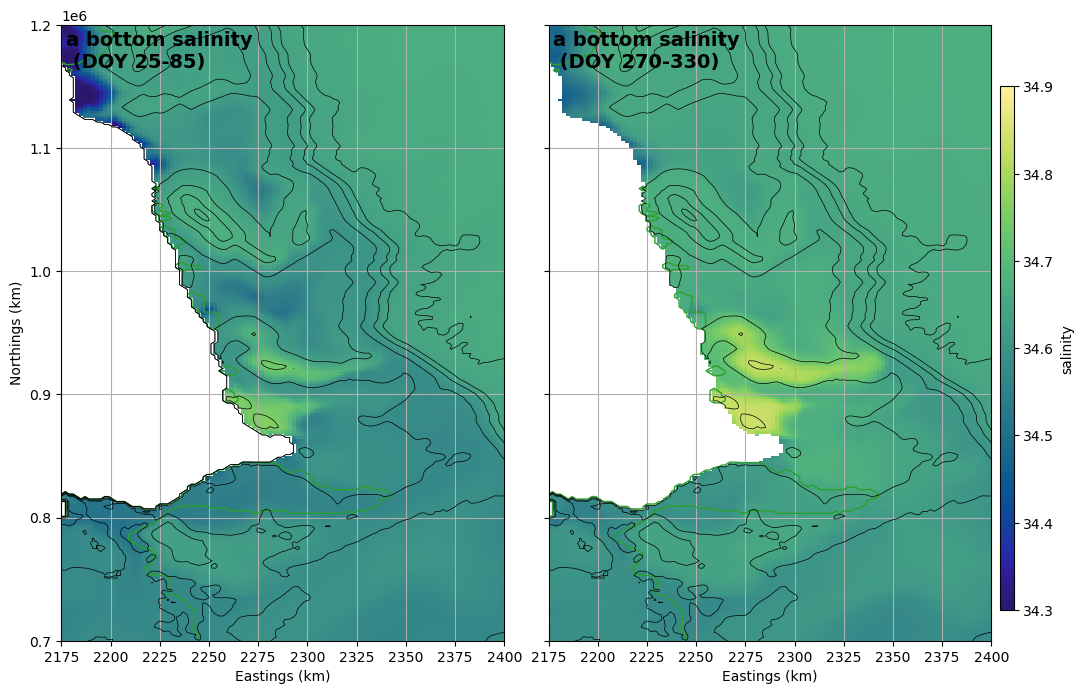

In [19]:


gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.1, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12,8])
ax = None

ax=fig.add_subplot(gs[0,0])
im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.3,vmax=34.9)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom salinity\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('Northings (km)')
ax.set_xlabel('Eastings (km)')
# ax.set_yticklabels([])
ax.set_title('')


ax=fig.add_subplot(gs[0,1])
im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,85)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.3,vmax=34.9)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom salinity\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('')
ax.set_xlabel('Eastings (km)')
ax.set_yticklabels([])
ax.set_title('')




cax = inset_axes(ax,
                width="1.5%",  # width = 10% of parent_bbox width
                height="85%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(1.02,.05, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='vertical') 
cax.set_ylabel(r'salinity')

Text(0, 0.5, 'salinity')

<Figure size 640x480 with 0 Axes>

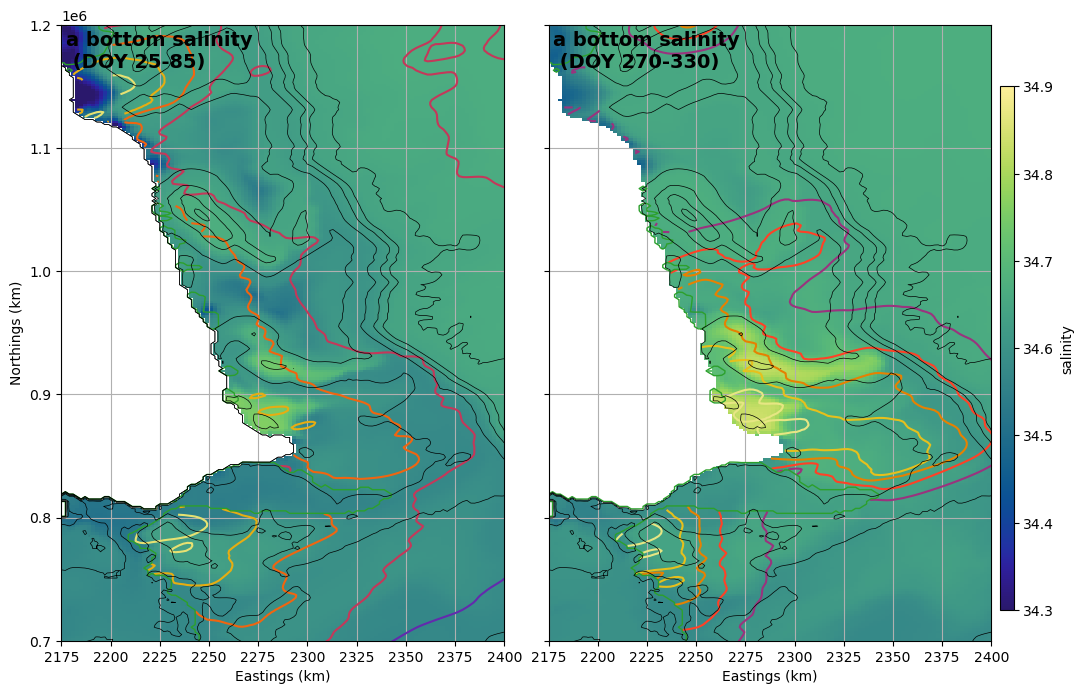

In [20]:

ds_his = xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_tamura+era_shflux.nc')
shflux = ds_his["shflux"] 
ds_his.close()


ds['mask_openocean'] = ds.mask_rho*(ds.mask_zice==0)
ds['mask_openoceanNaN'] = ds.mask_openocean.where(ds.mask_openocean)

# plt.pcolormesh(ds.x_rho,ds.y_rho,-shflux.isel(shf_time=slice(270,330)).mean(dim='shf_time')*ds.mask_openoceanNaN)


gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.1, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12,8])
ax = None

ax=fig.add_subplot(gs[0,0])
im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.3,vmax=34.9)

co = ax.contour(ds.x_rho,ds.y_rho,-shflux.isel(shf_time=slice(25,85)).mean(dim='shf_time')*ds.mask_openoceanNaN,cmap='CMRmap')


co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom salinity\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('Northings (km)')
ax.set_xlabel('Eastings (km)')
# ax.set_yticklabels([])
ax.set_title('')


ax=fig.add_subplot(gs[0,1])
im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,85)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.3,vmax=34.9)

co = ax.contour(ds.x_rho,ds.y_rho,-shflux.isel(shf_time=slice(270,330)).mean(dim='shf_time')*ds.mask_openoceanNaN,cmap='CMRmap')


co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom salinity\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('')
ax.set_xlabel('Eastings (km)')
ax.set_yticklabels([])
ax.set_title('')




cax = inset_axes(ax,
                width="1.5%",  # width = 10% of parent_bbox width
                height="85%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(1.02,.05, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='vertical') 
cax.set_ylabel(r'salinity')

Text(0.5, 0, 'salinity')

<Figure size 640x480 with 0 Axes>

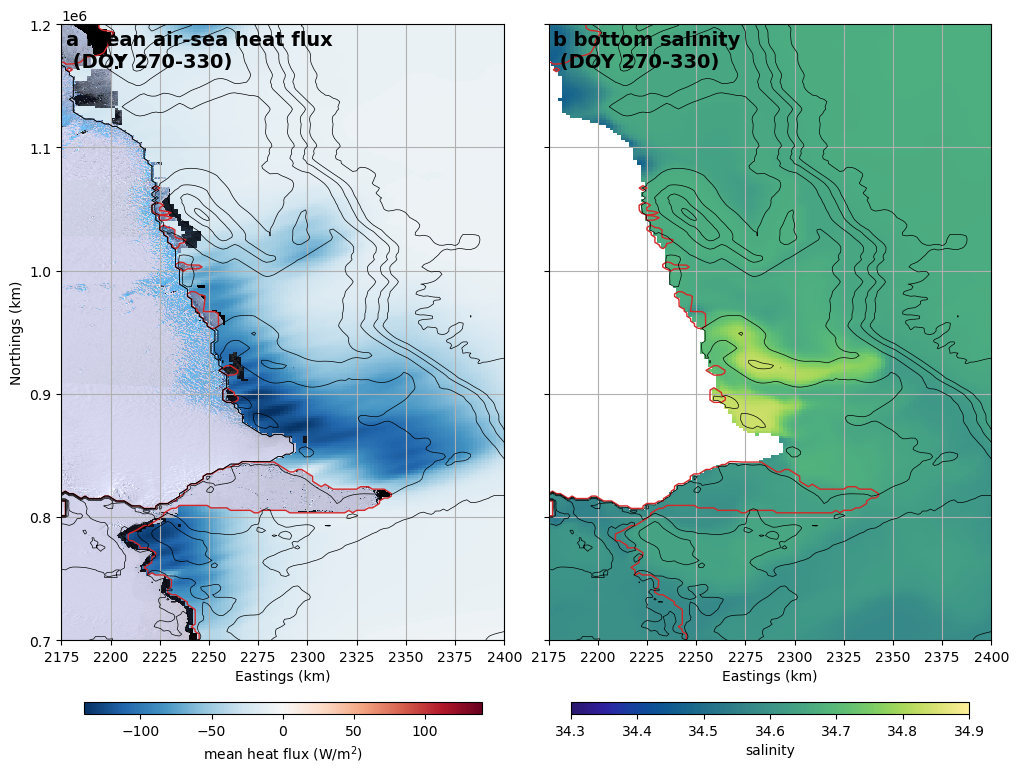

In [21]:
import rioxarray

lima_full = rioxarray.open_rasterio('../data/raw/lima/00000-20080319-092059124.tif')
lima = lima_full.where((lima_full.x>1.4e6)&(lima_full.x<3e6)&(lima_full.y>.1e6)&(lima_full.y<1.5e6),drop=True)


ds_his = xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_tamura+era_shflux.nc')
shflux = ds_his["shflux"] 
ds_his.close()


ds['mask_openocean'] = ds.mask_rho*(ds.mask_zice==0)
ds['mask_openoceanNaN'] = ds.mask_openocean.where(ds.mask_openocean)

# plt.pcolormesh(ds.x_rho,ds.y_rho,-shflux.isel(shf_time=slice(270,330)).mean(dim='shf_time')*ds.mask_openoceanNaN)


gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.1, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12,8])
ax = None

ax=fig.add_subplot(gs[0,0])
(lima.astype('uint8')).plot.imshow()
# im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.3,vmax=34.9)

im = ax.pcolormesh(ds.x_rho,ds.y_rho,shflux.isel(shf_time=slice(270,331)).mean(dim='shf_time')*ds.mask_openoceanNaN,cmap='RdBu_r',vmin=-140,vmax=140)


co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a mean air-sea heat flux\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('Northings (km)')
ax.set_xlabel('Eastings (km)')
# ax.set_yticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="45%",  # width = 10% of parent_bbox width
                height="2%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(0.05,-.12, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_xlabel(r'mean heat flux (W/m$^2$)')


ax=fig.add_subplot(gs[0,1])
im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,85)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.3,vmax=34.9)

co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'b bottom salinity\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('')
ax.set_xlabel('Eastings (km)')
ax.set_yticklabels([])
ax.set_title('')




cax = inset_axes(ax,
                width="45%",  # width = 10% of parent_bbox width
                height="2%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(0.05,-.12, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_xlabel(r'salinity')

Text(0, 0.5, 'density anomaly (kg/m3)')

<Figure size 640x480 with 0 Axes>

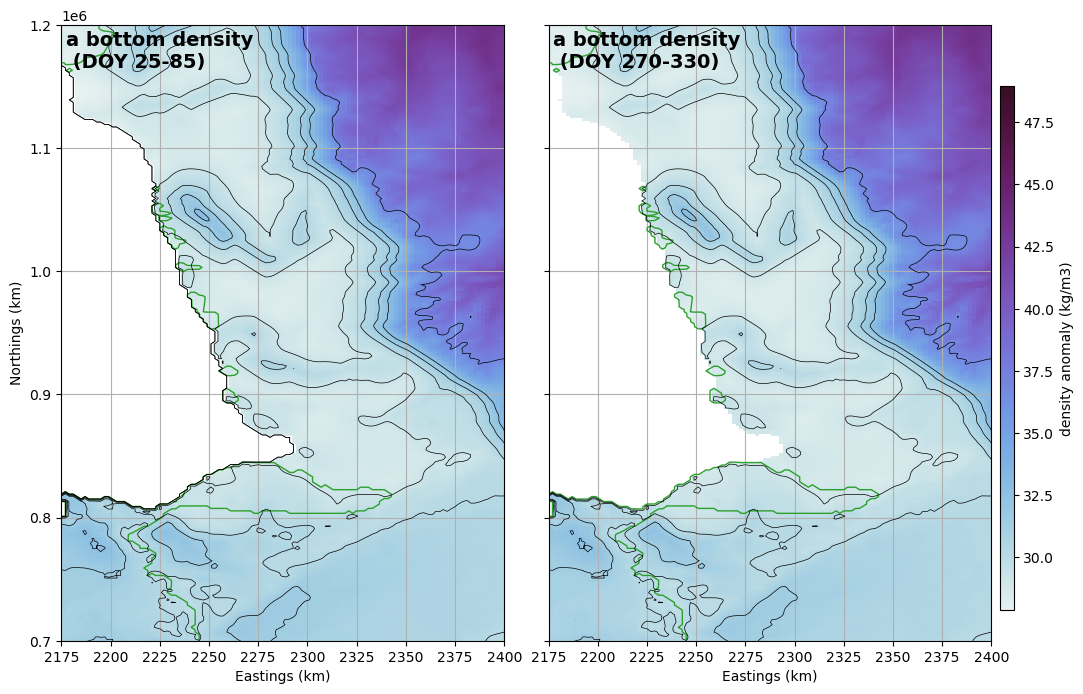

In [22]:


gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.1, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12,8])
ax = None

ax=fig.add_subplot(gs[0,0])
im = ds.rho.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.dense',add_colorbar=False)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom density\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('Northings (km)')
ax.set_xlabel('Eastings (km)')
# ax.set_yticklabels([])
ax.set_title('')


ax=fig.add_subplot(gs[0,1])
im = ds.rho.isel(s_rho=0).isel(ocean_time=slice(55,85)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.dense',add_colorbar=False)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom density\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('')
ax.set_xlabel('Eastings (km)')
ax.set_yticklabels([])
ax.set_title('')




cax = inset_axes(ax,
                width="1.5%",  # width = 10% of parent_bbox width
                height="85%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(1.02,.05, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='vertical') 
cax.set_ylabel(r'density anomaly (kg/m3)')

In [23]:
# calculate the potential density anomaly ref to 0

import seawater as sw

sigma_0_5_18 = sw.pden(ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').values,sw.temp(ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').values,ds.temp.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').values,ds.z_rho0.isel(s_rho=0).values),ds.z_rho0.isel(s_rho=0).values,0)-1000

sigma_0_55_67 = sw.pden(ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,sw.temp(ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,ds.temp.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,ds.z_rho0.isel(s_rho=0).values),ds.z_rho0.isel(s_rho=0).values,0)-1000



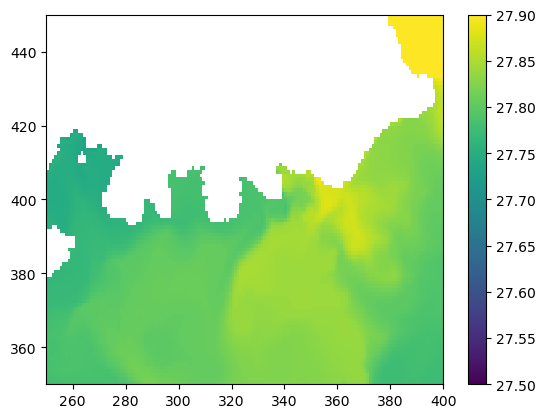

In [24]:
plt.pcolormesh(sw.pden(ds.salt.isel(s_rho=-1).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,sw.temp(ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,ds.temp.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,ds.z_rho0.isel(s_rho=0-1).values),ds.z_rho0.isel(s_rho=-1).values,0)-1000)
plt.colorbar()
plt.axis((250,400,350,450))
plt.clim((27.5,27.9))

Text(0.5, 0, 'potential density anomaly (kg/m3)')

<Figure size 640x480 with 0 Axes>

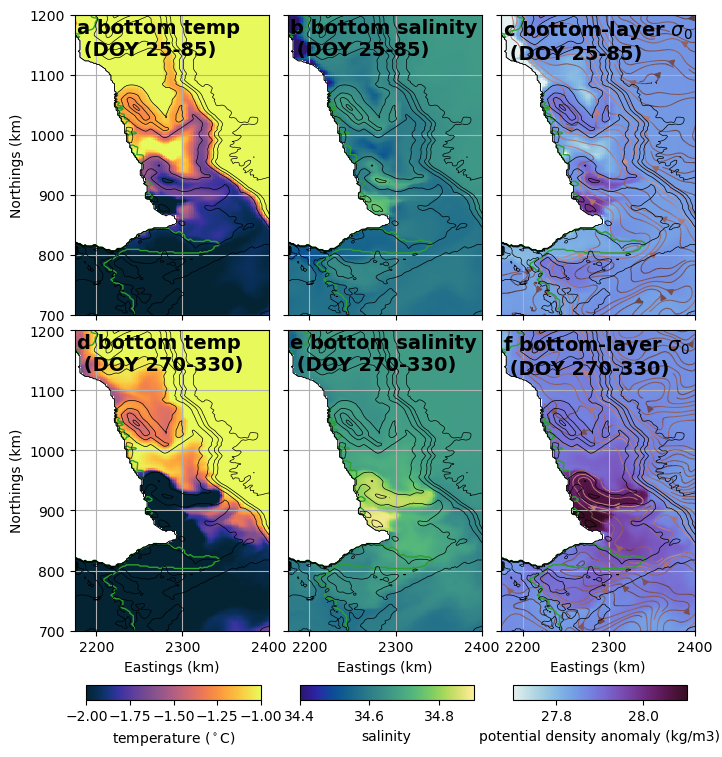

In [25]:


gs = gridspec.GridSpec(nrows=2,ncols=3,wspace=0.1, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[8,8])
ax = None


ax=fig.add_subplot(gs[0,0])
im = ds.temp.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False,vmin=-2,vmax=-1.)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom temp\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('Northings (km)')
# ax.set_xlabel('Eastings (km)')
# ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('')


ax=fig.add_subplot(gs[0,1])
im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.4,vmax=34.9)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'b bottom salinity\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
# ax.set_xlabel('Eastings (km)')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('')

ax=fig.add_subplot(gs[0,2])
uvel=ds.u_rho.isel(s_rho=-2).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')
vvel=ds.v_rho.isel(s_rho=-2).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')
vel_mag = np.sqrt(uvel**2+vvel**2).squeeze()**0.5
str_kwargs = {"color":vel_mag.values,
              "linewidth":.75,
              "arrowsize":1,
              "density":10,
              "cmap":"pink"}
im = plt.pcolormesh(ds.x_rho,ds.y_rho,sigma_0_5_18,cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im = ds.rho.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.dense',add_colorbar=False,vmin=29,vmax=34)
st = ax.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'c bottom-layer $\sigma_0$ \n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('')




ax=fig.add_subplot(gs[1,0])
im = ds.temp.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False,vmin=-2,vmax=-1)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'd bottom temp\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('Northings (km)')
ax.set_xlabel('Eastings (km)')
# ax.set_yticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="45%",  # width = 10% of parent_bbox width
                height="5%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.06,-.23, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_xlabel(r'temperature ($^\circ$C)')


ax=fig.add_subplot(gs[1,1])
im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.4,vmax=34.9)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'e bottom salinity\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('')
ax.set_xlabel('Eastings (km)')
ax.set_yticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="45%",  # width = 10% of parent_bbox width
                height="5%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.06,-.23, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_xlabel(r'salinity')

uvel=ds.u_rho.isel(s_rho=-2).isel(ocean_time=slice(55,67)).mean(dim='ocean_time')
vvel=ds.v_rho.isel(s_rho=-2).isel(ocean_time=slice(55,67)).mean(dim='ocean_time')
vel_mag = np.sqrt(uvel**2+vvel**2).squeeze()**0.5
str_kwargs = {"color":vel_mag.values,
              "linewidth":.75,
              "arrowsize":1,
              "density":10,
              "cmap":"pink"}
ax=fig.add_subplot(gs[1,2])
im = plt.pcolormesh(ds.x_rho,ds.y_rho,sigma_0_55_67,cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im = ds.rho.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.dense',add_colorbar=False,vmin=29,vmax=34)
st = ax.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'f bottom-layer $\sigma_0$ \n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('')
ax.set_xlabel('Eastings (km)')
ax.set_yticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="45%",  # width = 10% of parent_bbox width
                height="5%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.06,-.23, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_xlabel(r'potential density anomaly (kg/m3)')

In [26]:
# make bottom density 
sigma_0_bot = sw.pden(ds.salt.isel(s_rho=0).values,sw.temp(ds.salt.isel(s_rho=0).values,ds.temp.isel(s_rho=0).values,ds.z_rho0.isel(s_rho=0).values),ds.z_rho0.isel(s_rho=0).values,0)-1000
ds['sigma_0_bot']=(('ocean_time','eta_rho','xi_rho'),sigma_0_bot)


ds['sigma_0_bot_clima'] = ds.sigma_0_bot.groupby('ocean_time.dayofyear').mean()

Text(0.5, 1.0, '')

<Figure size 640x480 with 0 Axes>

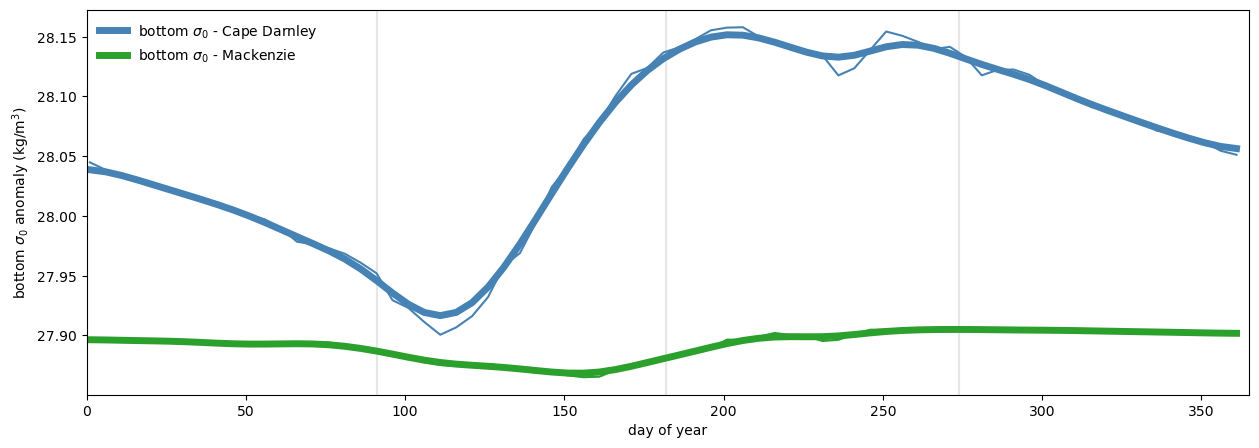

In [27]:
from scipy.ndimage import gaussian_filter1d


# image_save_dpi = 200

# plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])



# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')

ax.plot(ds.dayofyear,ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=440),color='steelblue',linewidth=1.5)
ax.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=440), 2),color='steelblue',linewidth=5,label='bottom $\sigma_0$ - Cape Darnley')
# ax.plot(ds.dayofyear,ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=462),color='C4',linewidth=.5)
# ax.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=462), 2),color='C4',linewidth=2.5,label='bottom $\sigma_0$ - Burton basin')
ax.plot(ds.dayofyear,ds.sigma_0_bot_clima.isel(xi_rho=362,eta_rho=391),color='C2',linewidth=1.5)
ax.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_bot_clima.isel(xi_rho=362,eta_rho=391), 2),color='C2',linewidth=5,label='bottom $\sigma_0$ - Mackenzie')


# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel('bottom $\sigma_0$ anomaly (kg/m$^3$)')
ax.set_xlabel('day of year')
# ax.grid()

ax.legend(frameon=False,loc='upper left')
ax.set_title('')





In [ ]:
ds['salt_clima'] = ds.salt.groupby('ocean_time.dayofyear').mean()


Text(0.5, 1.0, '')

<Figure size 640x480 with 0 Axes>

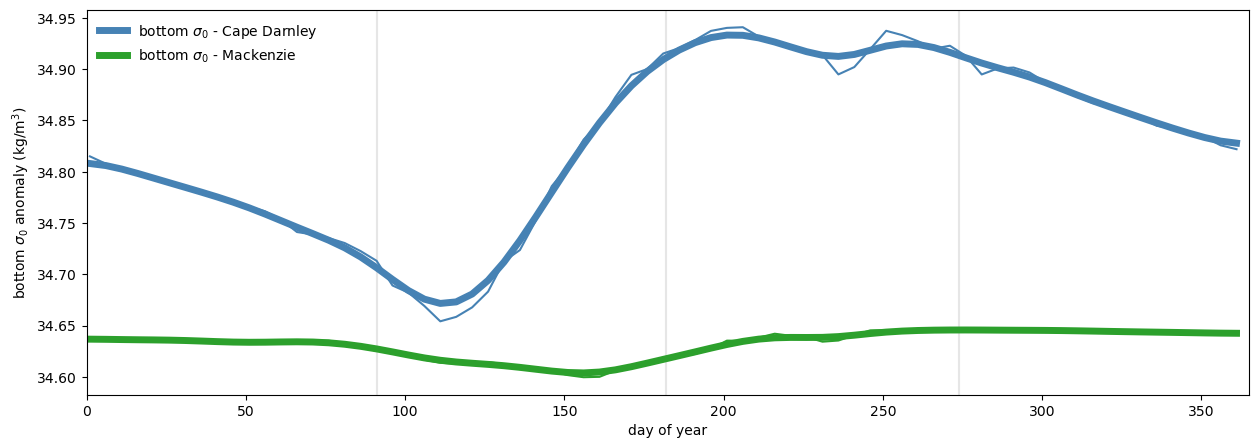

In [38]:
from scipy.ndimage import gaussian_filter1d


# image_save_dpi = 200

# plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])



# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')

ax.plot(ds.dayofyear,ds.salt_clima.isel(s_rho=0).isel(xi_rho=390,eta_rho=440),color='steelblue',linewidth=1.5)
ax.plot(ds.dayofyear,gaussian_filter1d(ds.salt_clima.isel(s_rho=0).isel(xi_rho=390,eta_rho=440), 2),color='steelblue',linewidth=5,label='bottom $\sigma_0$ - Cape Darnley')
# ax.plot(ds.dayofyear,ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=462),color='C4',linewidth=.5)
# ax.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=462), 2),color='C4',linewidth=2.5,label='bottom $\sigma_0$ - Burton basin')
ax.plot(ds.dayofyear,ds.salt_clima.isel(s_rho=0).isel(xi_rho=362,eta_rho=391),color='C2',linewidth=1.5)
ax.plot(ds.dayofyear,gaussian_filter1d(ds.salt_clima.isel(s_rho=0).isel(xi_rho=362,eta_rho=391), 2),color='C2',linewidth=5,label='bottom $\sigma_0$ - Mackenzie')


# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((34.6,34.65))
ax.set_ylabel('bottom $\sigma_0$ anomaly (kg/m$^3$)')
ax.set_xlabel('day of year')
# ax.grid()

ax.legend(frameon=False,loc='upper left')
ax.set_title('')



